<a href="https://colab.research.google.com/github/matin/garth/blob/main/colabs/chatgpt_analysis_of_stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# chatGPT analysis of Garmin stats

## Setup

Install [Garth](https://github.com/matin/garth) to download stats from Garmin Connect.

In [1]:
%pip install garth >& /dev/null

Set location of session tokens.

In [2]:
GARTH_HOME = "drive/MyDrive/garth"

Mount Google Drive to access session tokens.

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


Attempt to resume session. Otherwise, log in. Save updated session in both cases.

In [4]:
import garth
from garth.exc import GarthException
from getpass import getpass

try:
    garth.resume(GARTH_HOME)
    garth.client.username
except (FileNotFoundError, GarthException):
    email = input("Email: ")
    password = getpass("Password: ")
    garth.client.login(email, password)

garth.save(GARTH_HOME)

Import Pandas and define period for analysis.

In [5]:
import pandas as pd

DAYS = 365 * 3

## Query stats

### Sleep

In [6]:
from datetime import timedelta

sleep = pd.DataFrame(garth.DailySleep.list(period=DAYS))
sleep["calendar_date"] = sleep["calendar_date"].apply(lambda x: x - timedelta(days=1))
sleep.set_index("calendar_date", inplace=True)
sleep.rename(columns={"value": "sleep_quality"}, inplace=True)

### Steps

In [7]:
steps = pd.DataFrame(garth.DailySteps.list(period=DAYS))
steps.set_index("calendar_date", inplace=True)

### Stress

In [8]:
stress = pd.DataFrame(garth.DailyStress.list(period=DAYS))
stress.set_index("calendar_date", inplace=True)
stress["high_stress_duration"].fillna(0, inplace=True)
stress["medium_stress_duration"].fillna(0, inplace=True)

### Intensity minutes

In [9]:
im = pd.DataFrame(garth.DailyIntensityMinutes.list(period=DAYS))
im.set_index("calendar_date", inplace=True)
im["intensity_minutes"] = im["moderate_value"] + 2 * im["vigorous_value"]
im.rename(
    columns={
        "weekly_goal": "intensity_minutes_goal",
        "moderate_value": "moderate_intensity_minutes",
        "vigorous_value": "vigorous_intensity_minutes",
    },
    inplace=True
)

## Join stats

In [10]:
stats = (
    sleep
    .join(steps)
    .join(stress)
    .join(im)
)
stats

,sleep_quality,total_steps,total_distance,step_goal,overall_stress_level,rest_stress_duration,low_stress_duration,medium_stress_duration,high_stress_duration,intensity_minutes_goal,moderate_intensity_minutes,vigorous_intensity_minutes,intensity_minutes
calendar_date,,,,,,,,,,,,,
2021-09-08,64,2728,2259,8830,26,50100,14400,10020,1500.0,150,0.0,0.0,0.0
2021-09-09,65,7601,6338,7610,32,29100,24420,8520,1680.0,150,0.0,0.0,0.0
2021-09-10,81,25646,19797,7610,31,30780,16500,5880,4020.0,150,117.0,46.0,209.0
2021-09-11,0,6869,5701,9420,28,37380,18720,7380,1020.0,150,0.0,0.0,0.0
2021-09-13,76,17210,15660,8970,37,25440,16440,13680,4200.0,150,7.0,41.0,89.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-27,85,6367,5349,8740,30,34980,20460,6600,1200.0,150,0.0,0.0,0.0
2023-09-28,80,2363,2072,8510,29,40740,23580,8520,1200.0,150,0.0,0.0,0.0
2023-09-29,86,11261,8675,7280,38,32880,11520,11400,8160.0,150,44.0,2.0,48.0


## Download as a CSV that can be uploaded to chatGPT.

In [11]:
from google.colab import files
from ipywidgets import widgets
from IPython.display import display

def create_download_button(df, filename):
    def export_csv(df):
        df.to_csv(filename)
        files.download(filename)

    button = widgets.Button(description="Download CSV")
    button.on_click(lambda b: export_csv(df))
    display(button)

create_download_button(stats, "consolidated_garmin_stats.csv")

Button(description='Download CSV', style=ButtonStyle())

## chatGPT data analysis

Upload the CSV to chatGPT and ask the following questions:

---

How do I sleep on different days of the week?

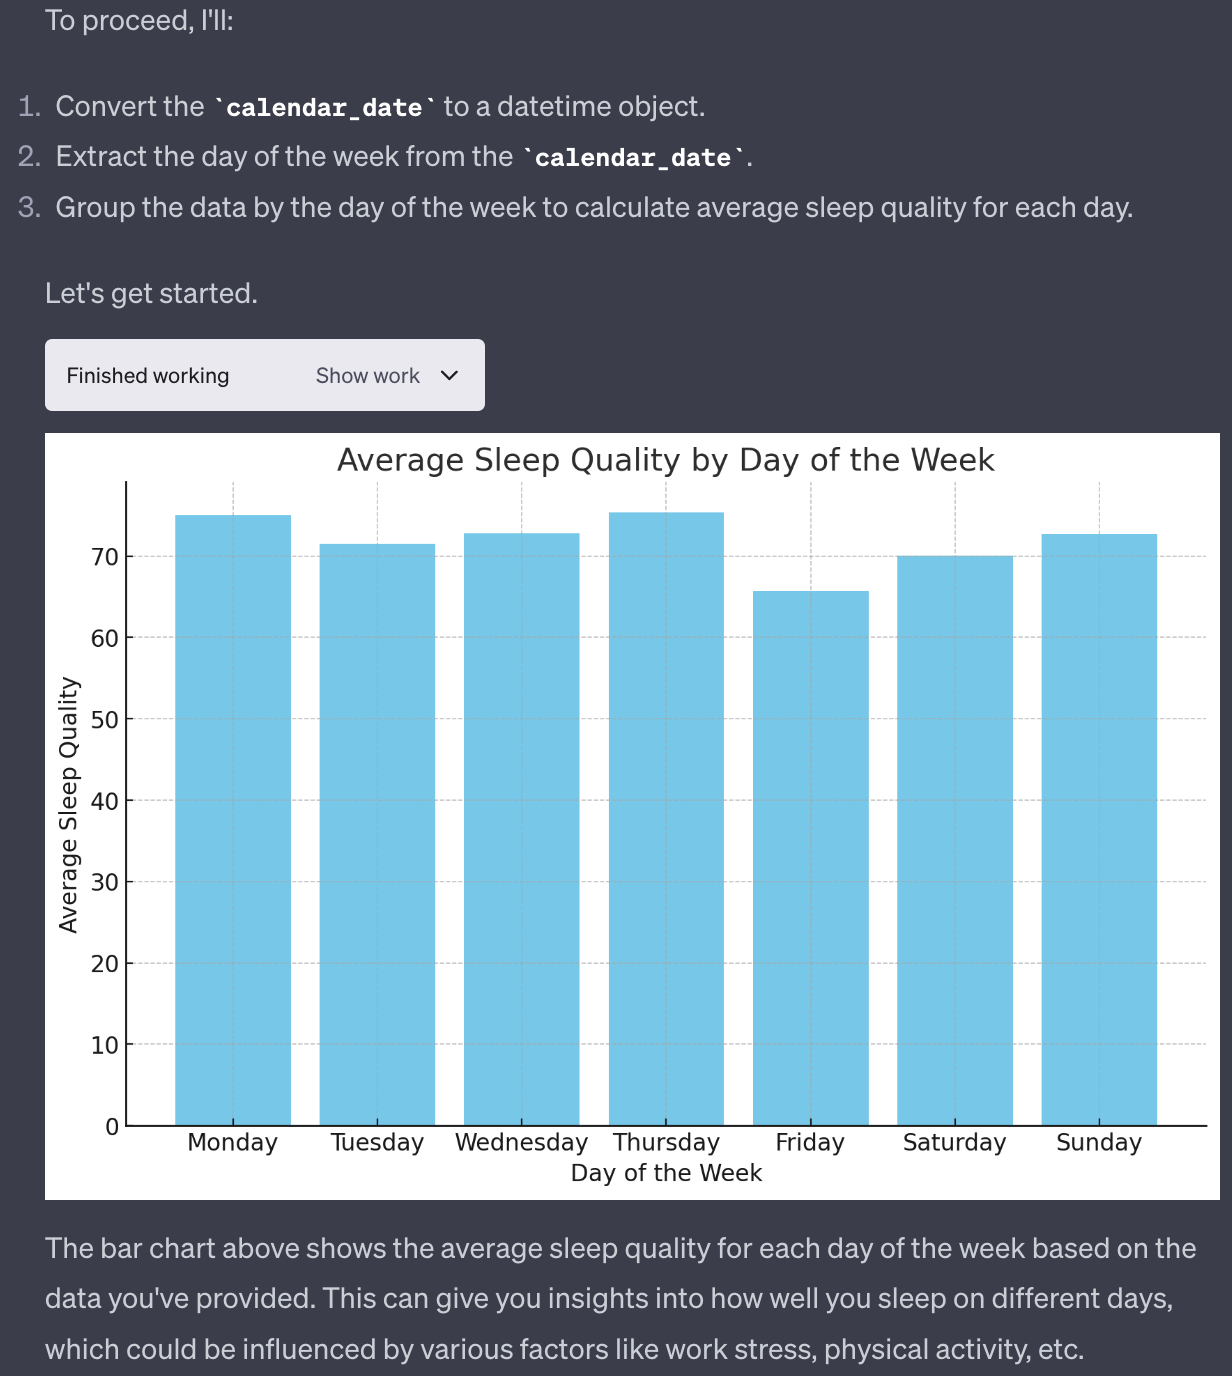

How does my sleep relate to the other stats? Is it correlated with any of the other stats?

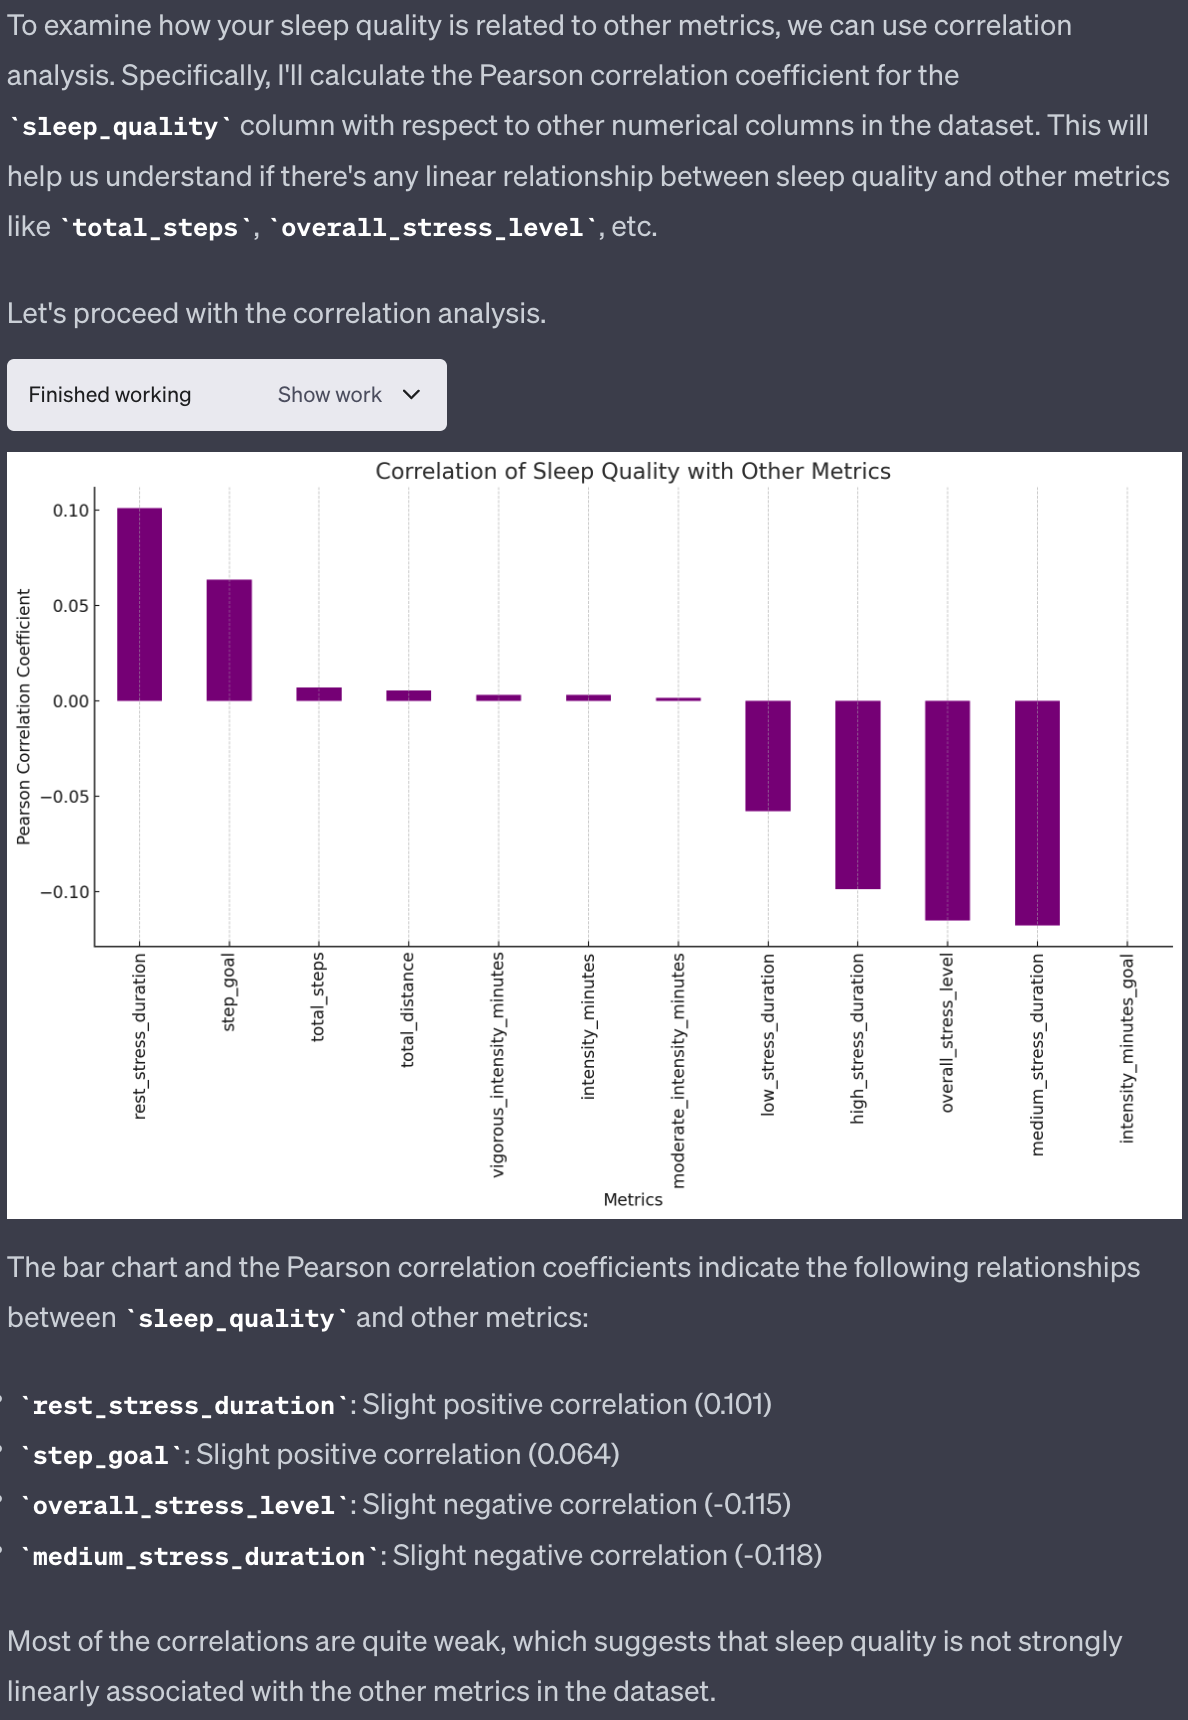

On what days do I exercise the most?

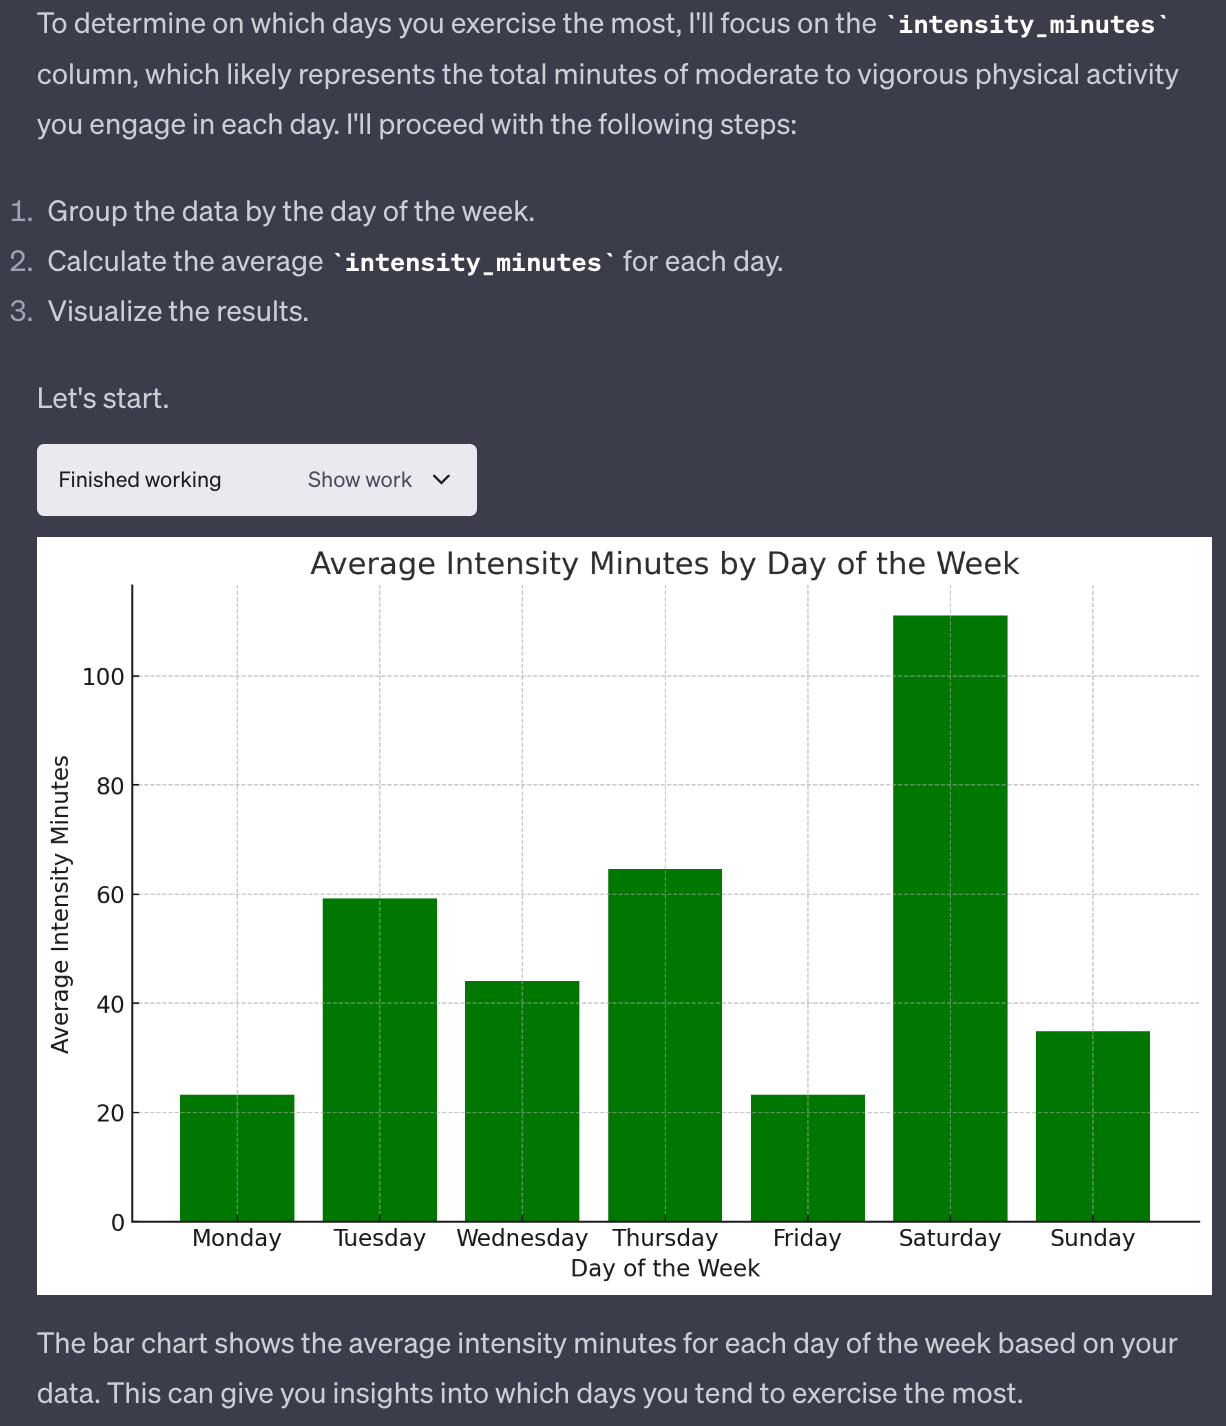